<h2>Test using a live video feed</h2>

In [4]:
from ultralytics import YOLO
# Load a model
model = YOLO("./runs/segment/train8/weights/best.pt")

In [19]:
# Test the model
import cv2
cap = cv2.VideoCapture(1)
results = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    resized_frame = cv2.resize(frame, (640, 480))    
    result = model(resized_frame)
    results.append(result)
    annotated_frame = result[0].plot()
    cv2.imshow("frame", annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 1 gauze, 1 scissors, 168.7ms
Speed: 2.5ms preprocess, 168.7ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 gauze, 1 scissors, 141.4ms
Speed: 1.5ms preprocess, 141.4ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 gauze, 1 scissors, 139.2ms
Speed: 3.0ms preprocess, 139.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 gauze, 1 scissors, 137.9ms
Speed: 2.0ms preprocess, 137.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 gauze, 1 scissors, 138.2ms
Speed: 1.0ms preprocess, 138.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 gauze, 1 scissors, 133.6ms
Speed: 2.1ms preprocess, 133.6ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 gauze, 1 scissors, 142.6ms
Speed: 2.1ms preprocess, 142.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 gauze, 1 scis

In [27]:
print(results)
print(len(results))

[[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'forceps', 1: 'gauze', 2: 'scissors'}
obb: None
orig_img: array([[[ 42,  39,   3],
        [ 41,  39,   4],
        [ 39,  37,   3],
        ...,
        [ 55,  53,  44],
        [ 57,  54,  45],
        [ 57,  54,  45]],

       [[ 40,  39,   5],
        [ 39,  37,   4],
        [ 34,  32,   1],
        ...,
        [ 55,  53,  44],
        [ 55,  53,  44],
        [ 55,  53,  44]],

       [[ 39,  37,   3],
        [ 37,  34,   4],
        [ 33,  30,   3],
        ...,
        [ 55,  53,  44],
        [ 53,  51,  42],
        [ 53,  51,  42]],

       ...,

       [[131, 118,   0],
        [130, 117,   0],
        [134, 120,   0],
        ...,
        [ 46,  37,  30],
        [ 42,  35,  27],
        [ 68,  61,  52]],

       [[130, 117,   0],
        [129, 116,   0],
        [130, 117,   0],
        ...

In [36]:
print(results[0])

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'forceps', 1: 'gauze', 2: 'scissors'}
obb: None
orig_img: array([[[ 42,  39,   3],
        [ 41,  39,   4],
        [ 39,  37,   3],
        ...,
        [ 55,  53,  44],
        [ 57,  54,  45],
        [ 57,  54,  45]],

       [[ 40,  39,   5],
        [ 39,  37,   4],
        [ 34,  32,   1],
        ...,
        [ 55,  53,  44],
        [ 55,  53,  44],
        [ 55,  53,  44]],

       [[ 39,  37,   3],
        [ 37,  34,   4],
        [ 33,  30,   3],
        ...,
        [ 55,  53,  44],
        [ 53,  51,  42],
        [ 53,  51,  42]],

       ...,

       [[131, 118,   0],
        [130, 117,   0],
        [134, 120,   0],
        ...,
        [ 46,  37,  30],
        [ 42,  35,  27],
        [ 68,  61,  52]],

       [[130, 117,   0],
        [129, 116,   0],
        [130, 117,   0],
        ...,

In [37]:
print(results[0][0].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 2.])
conf: tensor([0.7588, 0.7584])
data: tensor([[ 53.8568, 108.9181, 204.6889, 172.6098,   0.7588,   1.0000],
        [351.2046,  76.6013, 485.3251, 151.0241,   0.7584,   2.0000]])
id: None
is_track: False
orig_shape: (480, 640)
shape: torch.Size([2, 6])
xywh: tensor([[129.2729, 140.7639, 150.8320,  63.6916],
        [418.2648, 113.8127, 134.1205,  74.4228]])
xywhn: tensor([[0.2020, 0.2933, 0.2357, 0.1327],
        [0.6535, 0.2371, 0.2096, 0.1550]])
xyxy: tensor([[ 53.8568, 108.9181, 204.6889, 172.6098],
        [351.2046,  76.6013, 485.3251, 151.0241]])
xyxyn: tensor([[0.0842, 0.2269, 0.3198, 0.3596],
        [0.5488, 0.1596, 0.7583, 0.3146]])


<h3>

1. Get all the results in the last 5 seconds

2. Iterate through each result

3. if there was a detection of the class at least once in the frame with confidence above 0.5, increment a counter corresponding to the class; each result can increment a class counter at most once

4. Compute a list of the classes where the counter for it is greater than half of the length of total number of results

5. Create an algorithm that returns the best result object that detected all the classes in the list in step 4 and had the highest overall confidence for each class
</h3>

In [64]:
from collections import defaultdict

def find_best_result(results):
    total_results = len(results)
    class_counters = defaultdict(int)

    # Step 1: Count the classes detected in each result
    for result_obj in results:
        result_obj = result_obj[0]
        result_classes = set()
        boxes_data = result_obj.boxes.data
        for detection in boxes_data:
            confidence = detection[4]
            cls = int(detection[5])
            if confidence > 0.5 and cls not in result_classes:
                class_counters[cls] += 1
                result_classes.add(cls)

    # Step 2: Identify classes detected in more than half of the results
    required_classes = [cls for cls, count in class_counters.items() if count > total_results / 2]

    # Step 3: Find the best result object
    best_result = None
    highest_total_confidence = 0
    frame_idx = None

    for i, result_obj in enumerate(results):
        detected_classes = set()
        confidences_per_class = defaultdict(float)
        boxes_data = result_obj[0].boxes.data
        for detection in boxes_data:
            confidence = detection[4]
            cls = int(detection[5])
            if cls in required_classes and confidence > 0.5:
                detected_classes.add(cls)
                confidences_per_class[cls] += confidence

        if set(required_classes).issubset(detected_classes):
            total_confidence = sum(confidences_per_class.values())
            if total_confidence > highest_total_confidence:
                highest_total_confidence = total_confidence
                best_result = result_obj
                frame_idx = i

    return frame_idx, best_result

In [80]:
idx, res = find_best_result(results)

<h2>Show the best result</h2>

In [83]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


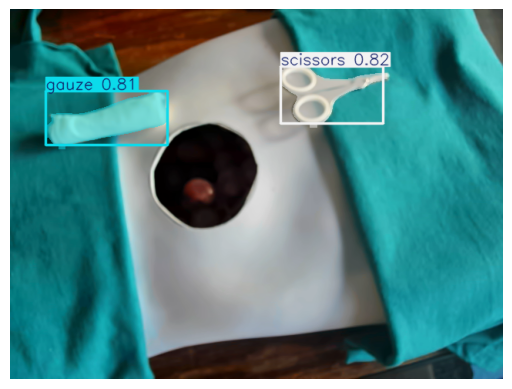

In [84]:
from matplotlib import pyplot as plt

# Assuming annotated_frame is the image you want to display
annotated_frame = res[0].plot()

# Convert from BGR (OpenCV format) to RGB (Matplotlib format)
annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(annotated_frame_rgb)
plt.axis('off')  # Turn off the axis labels
plt.show()


<h2>Parse data for necessary context</h2>